In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
import glob

In [3]:
file_date = '2019-08-30-003453'

In [4]:
print(os.getcwd())
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/'+file_date+'/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/2019-08-30-003453/log\\2019-08-30.csv',
 '../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/2019-08-30-003453/log\\2019-08-31.csv']

In [6]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(50934, 4)
(49066, 4)


In [7]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [8]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(100000, 168)

In [9]:
Agent_1_action_df

actuator_name,light_node#1,light_node#2,light_node#3,light_node#4,light_node#5,light_node#6,light_node#7,light_node#8,light_node#9,light_node#10,...,sma3_node#23,sma4_node#23,sma5_node#23,sma6_node#23,sma1_node#24,sma2_node#24,sma3_node#24,sma4_node#24,sma5_node#24,sma6_node#24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.664337,-0.327557,0.114122,-0.885953,0.938264,-0.909021,0.322788,-0.985023,0.842015,0.097932,...,0.839764,0.588729,-0.002979,0.536445,0.867721,0.997133,-0.417805,-0.784086,0.821330,-0.911237
2,-0.749869,-0.301452,-0.791134,-0.882030,0.697624,-0.955799,0.952312,-0.785607,0.564268,-0.687261,...,0.569573,0.001887,-0.915792,-0.367964,0.966127,0.976051,0.906191,-0.550513,0.570322,0.094547
3,-0.875934,0.475416,-0.923918,-0.938116,-0.049331,-0.899279,0.523044,-0.990454,0.431495,0.171198,...,-0.139325,0.934167,-0.986430,-0.782188,-0.270143,0.990229,0.652687,-0.483917,-0.390161,-0.323388
4,-0.850136,0.256382,-0.995871,-0.927462,0.509924,-0.922527,-0.102369,-0.898727,0.729174,-0.250212,...,0.330860,0.964843,-0.962500,-0.833226,0.986679,0.956310,0.849912,0.009512,0.815018,0.292824
5,-0.673090,-0.753207,-0.991786,-0.671113,0.898823,-0.420107,0.284336,-0.873351,0.505869,0.145595,...,0.107053,0.809968,-0.939032,-0.398453,0.715475,0.995124,0.639929,-0.904978,-0.978756,-0.809025
6,-0.468641,-0.846416,-0.658025,-0.653533,0.724245,-0.157272,0.550165,-0.897931,0.914537,0.113037,...,0.379961,-0.274994,-0.921749,0.233314,0.984399,0.993893,0.929930,-0.380428,-0.439197,-0.402214
7,-0.563112,-0.354569,-0.835470,-0.972106,0.612301,-0.657995,0.848970,-0.881506,0.810229,-0.079492,...,0.478714,-0.160447,-0.941094,0.223204,0.951927,0.991288,0.948997,-0.592138,0.071692,-0.525153
8,-0.836001,-0.361063,-0.997580,-0.843846,0.891395,-0.926217,-0.366516,-0.960698,0.488920,0.396519,...,-0.114416,0.993519,-0.957506,-0.831503,0.668830,0.992557,0.523729,-0.772612,0.413048,-0.369346
9,-0.600692,-0.726684,-0.899966,-0.943843,0.840741,-0.318060,0.404171,-0.796404,0.945433,0.342468,...,0.394398,-0.049821,-0.893337,0.019569,0.951998,0.990804,0.942790,-0.446643,-0.700803,-0.584360


c:\users\daiwei lin\appdata\local\conda\conda\envs\unity_ml\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


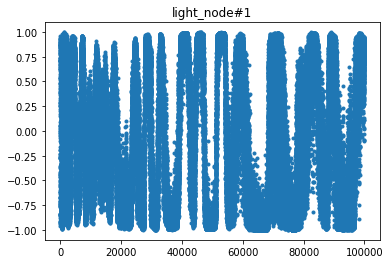

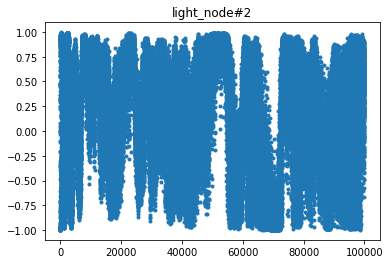

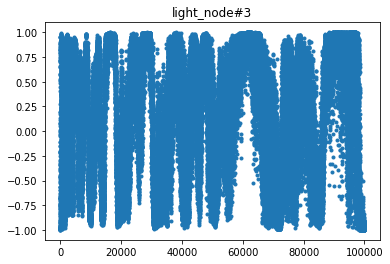

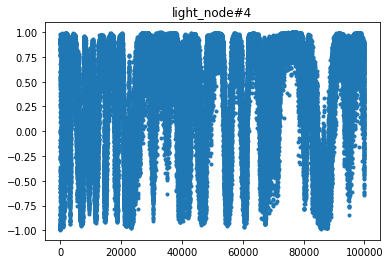

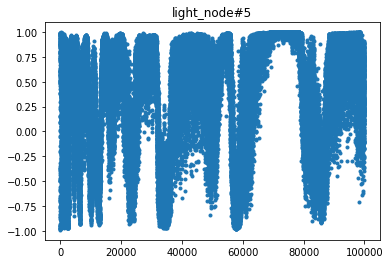

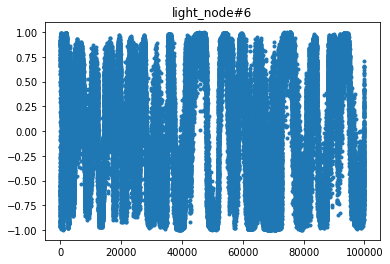

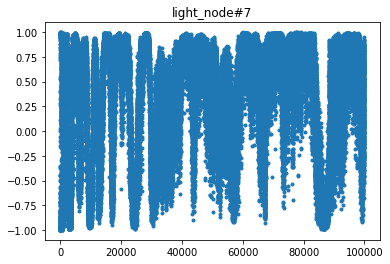

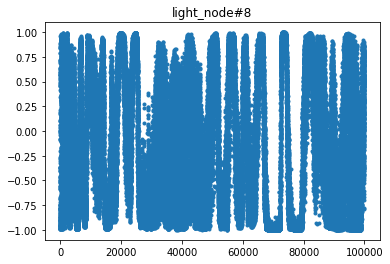

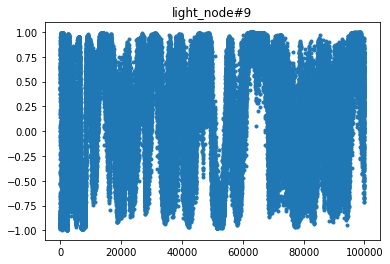

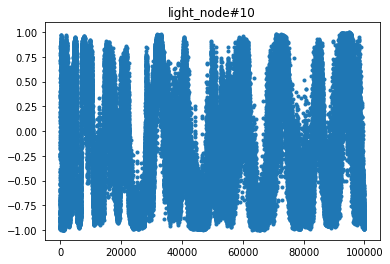

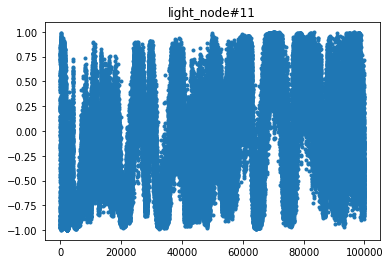

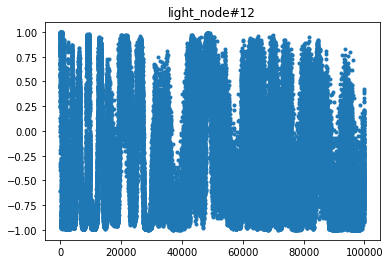

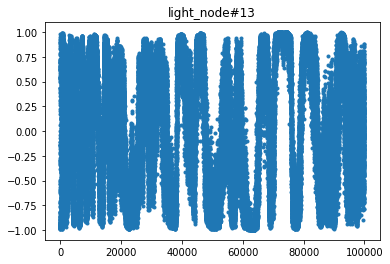

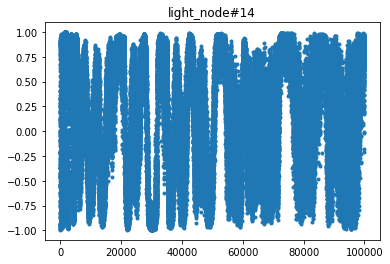

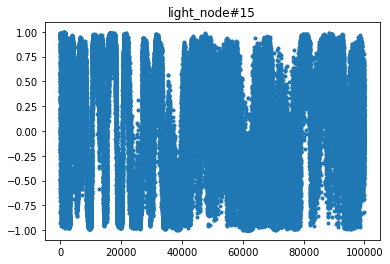

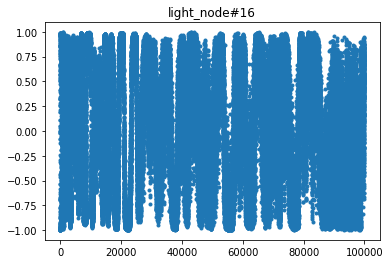

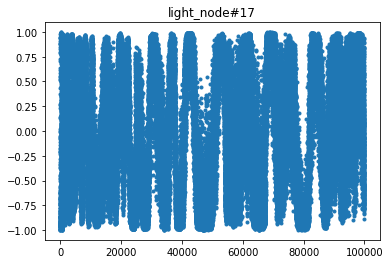

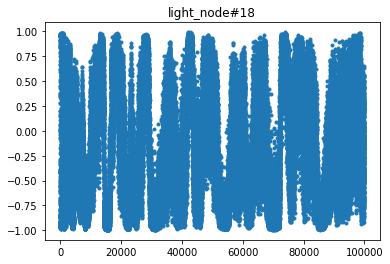

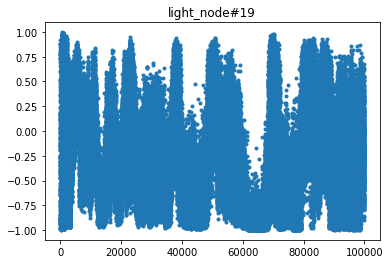

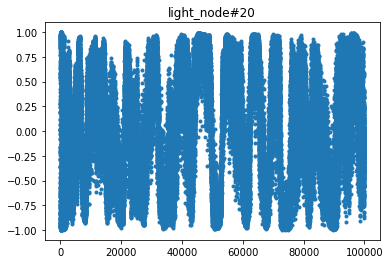

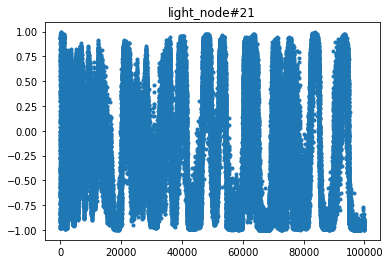

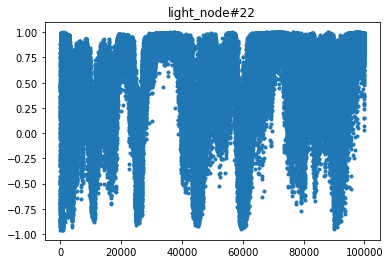

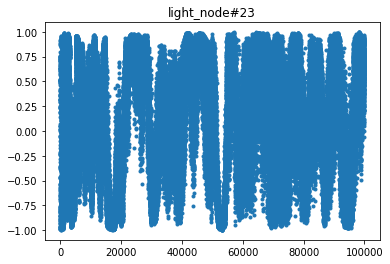

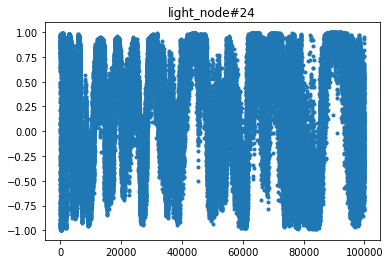

In [10]:
for i in range(24):
    plt.figure()
    col_name = 'light_node#'+str(i+1)
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col_name],'.')
    plt.title(col_name)
    

## Visitor activities

In [36]:
import re
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/"+file_date+"/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
title = "Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,"+ \
        "Location_x_2,Location_y_2,Location_z_2,Destination_x_2,Destination_y_2,Destination_z_2,Distance_2,"+ \
        "Location_x_3,Location_y_3,Location_z_3,Destination_x_3,Destination_y_3,Destination_z_3,Distance_3,"+ \
        "Location_x_4,Location_y_4,Location_z_4,Destination_x_4,Destination_y_4,Destination_z_4,Distance_4,"+ \
        "Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5"+"\n"
f_out.write(title)
for line in f_in:
    if line.strip():# not empty line    
        
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

['../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/2019-08-30-003453\\s_multi_sara_18825929ob.out']


### 1. Position

In [5]:
visitor_data = pd.read_csv("../SHARCNET/Results/multi/big_collision_model/original/SARA_LED_Multi/"+file_date+"/visitor_log.csv", sep=',')
print(visitor_data.shape)

(2450000, 36)


In [6]:
visitor_data.shape

(2450000, 36)

In [7]:
visitor_data.head()

,Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,Location_x_2,Location_y_2,...,Destination_y_4,Destination_z_4,Distance_4,Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5
0,0.02,0.0,0.0,0.0,-5.3,0.1,-1.4,0.0,0.0,0.0,...,0.1,0.4,0.0,-0.1,1.0,0.2,4.9,0.1,-0.2,0.0
1,0.04,-0.1,0.0,0.3,-5.3,0.1,-1.4,0.0,0.5,0.0,...,0.1,0.4,0.0,-0.7,1.2,1.2,4.9,0.1,-0.2,0.0
2,0.06,-0.1,0.0,0.9,-5.3,0.1,-1.4,0.0,0.9,0.0,...,0.1,0.4,0.0,-1.1,1.3,2.0,4.9,0.1,-0.2,0.0
3,0.08,-0.1,0.0,1.2,-5.3,0.1,-1.4,0.0,1.4,0.0,...,0.1,0.4,0.0,-1.3,1.4,2.7,4.9,0.1,-0.2,0.0
4,0.10,-0.2,0.0,1.5,-5.3,0.1,-1.4,0.0,1.9,0.0,...,0.1,0.4,0.0,-1.6,1.5,3.4,4.9,0.1,-0.2,0.0


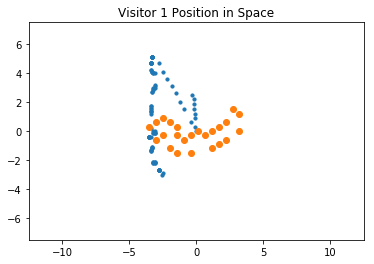

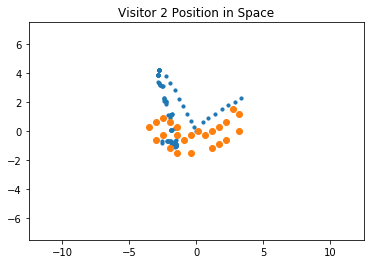

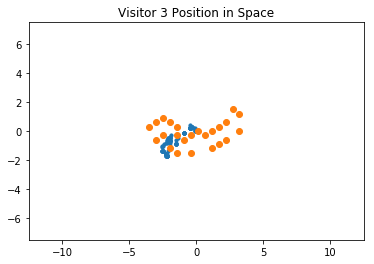

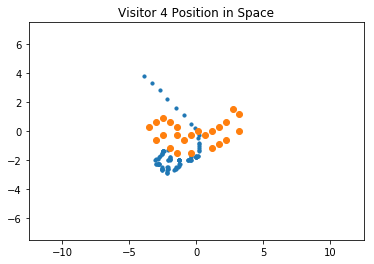

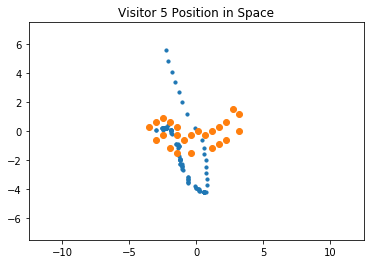

In [40]:
nodes_position = pd.read_csv("NodePosition.csv")

for i in range(1,6):
    plt.figure()
    plt.scatter(visitor_data['Location_x_' + str(i)], visitor_data['Location_z_' + str(i)], s=10)
    plt.xlim([-12.5,12.5])
    plt.ylim([-7.5,7.5])
    plt.title("Visitor "+ str(i) + " Position in Space")
    plt.scatter(nodes_position['x'], nodes_position['z'])

In [30]:
import seaborn
def heat_map(resolution, data_x, data_z):
    bins_x = np.linspace(-10,10,resolution[0]+1)
    bins_z = np.linspace(-5,5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (x_discretized[i],z_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
    ax.invert_yaxis()
    return activity_map


In [33]:
resolution = (10,10)

activity_map = heat_map(resolution,visitor_data['Location_x_1'],visitor_data['Location_z_1'])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [46]:
for i in range(1,6):
    print("\nVisitor {}".format(i))
    print("z maz {}".format(np.max(visitor_data['Location_z_'+str(i)])))
    print("z min {}".format(np.min(visitor_data['Location_z_'+str(i)])))
    print("x max {}".format(np.max(visitor_data['Location_x_'+str(i)])))
    print("x min {}".format(np.min(visitor_data['Location_x_'+str(i)])))


Visitor 1
z maz 14.7
z min -3.5
x max 3.3
x min -46.4

Visitor 2
z maz 22.8
z min -3.7
x max 25.4
x min -8.6

Visitor 3
z maz 2.5
z min -2.8
x max 3.7
x min -4.4

Visitor 4
z maz 23.8
z min -3.6
x max 25.4
x min -4.9

Visitor 5
z maz 25.3
z min -2.9
x max 26.0
x min -7.8


## IR detection

In [ ]:
ir_detection = pd.read_csv("IR_detection_area.csv")
ir_detection.head()

In [18]:
def is_inside_area(ir, point):
    signs = []
    for j in range(4):
        corner = ir[j*2:j*2+2]
        vector = corner - point
        edge = ir[8+j*2:8+j*2+2]
        signs.append(np.sign(np.cross(vector,edge)))
    
#     plt.plot(ir[:8][::2], ir[:8][1::2])
    if np.all(signs[0] == signs):
        #print("Inside")
        return True
    else:
        #print("Not inside")
        return False

In [46]:
columns = []
for i in range(5):
    for j in range(24):
        colname = "ir{}_v{}".format(j,i)
        columns.append(colname)
ir_detection_df = pd.DataFrame(columns=columns)


for index, row in visitor_data[:100].iterrows():
    is_inside = np.array([])
    for i in range(5):
        position = [row["Location_x_{}".format(i+1)], row["Location_z_{}".format(i+1)]]
        visitor_is_inside= np.zeros((24,))
        for j in range(24):
            visitor_is_inside[j] = is_inside_area(ir_detection.iloc[j], position)
        is_inside = np.append(is_inside, visitor_is_inside)
    ir_detection_df.loc[index] = is_inside

In [45]:
ir_detection_df.to_csv("visitor_IR_detection.csv", index=False)

In [8]:
import matplotlib.patches as patches
import matplotlib as mpl

def plot_scene(ax=None):
    nodes_position = pd.read_csv("NodePosition.csv")
    if ax is None:
        fig = plt.figure(figsize=(12.5,7.5))
        ax = fig.add_subplot(111)
    
    ir_coverages = []
    for i in range(nodes_position.shape[0]):
        ir = patches.Rectangle((-0.5,0), 1, 2, color="blue",  alpha=0.20)
        T = mpl.transforms.Affine2D().rotate_deg(-180+(360-nodes_position.iloc[i]['angle'])) + mpl.transforms.Affine2D().translate(nodes_position.iloc[i]['x'], nodes_position.iloc[i]['z']) + ax.transData
        ir.set_transform(T)
        ax.add_patch(ir)
    plt.scatter(nodes_position['x'], nodes_position['z'])
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    return ax

import seaborn
from matplotlib.colors import LogNorm
def heat_map(resolution, data_x, data_z, axe=None):
    bins_x = np.linspace(-12.5,12.5,resolution[0]+1)
    bins_z = np.linspace(-7.5,7.5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (z_discretized[i],x_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu", ax=axe)
    ax.invert_yaxis()
    return activity_map, ax

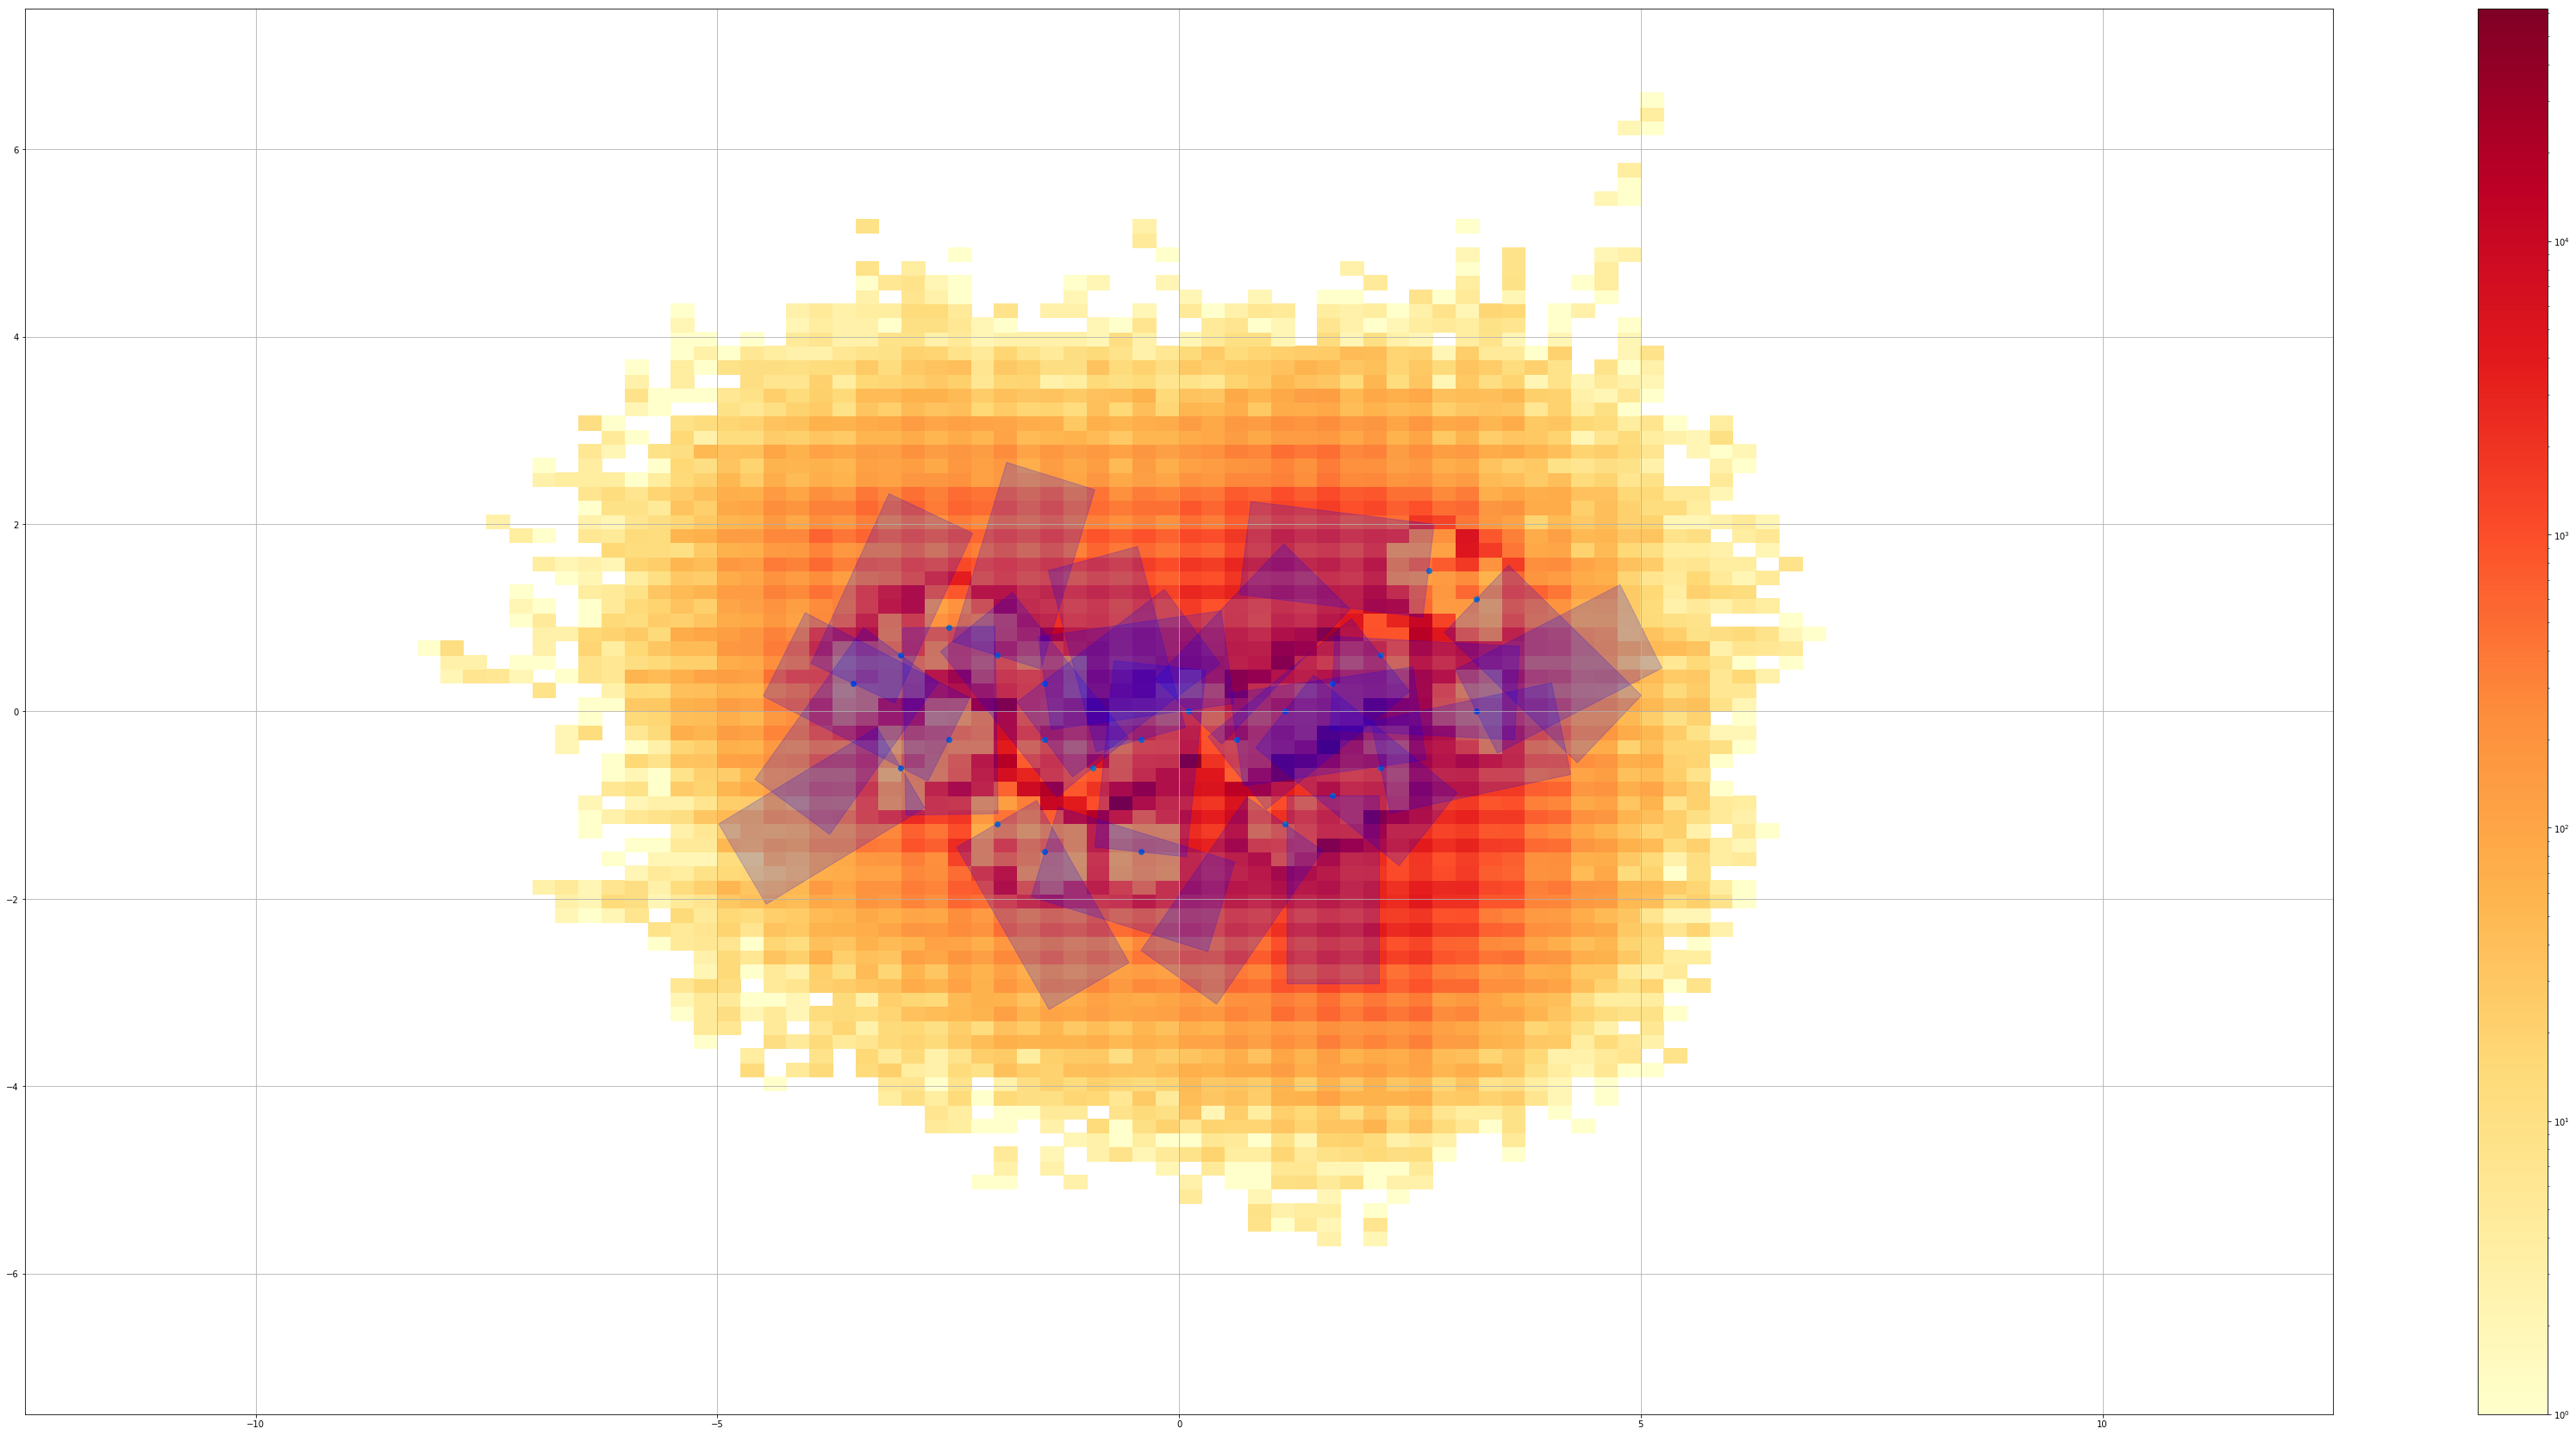

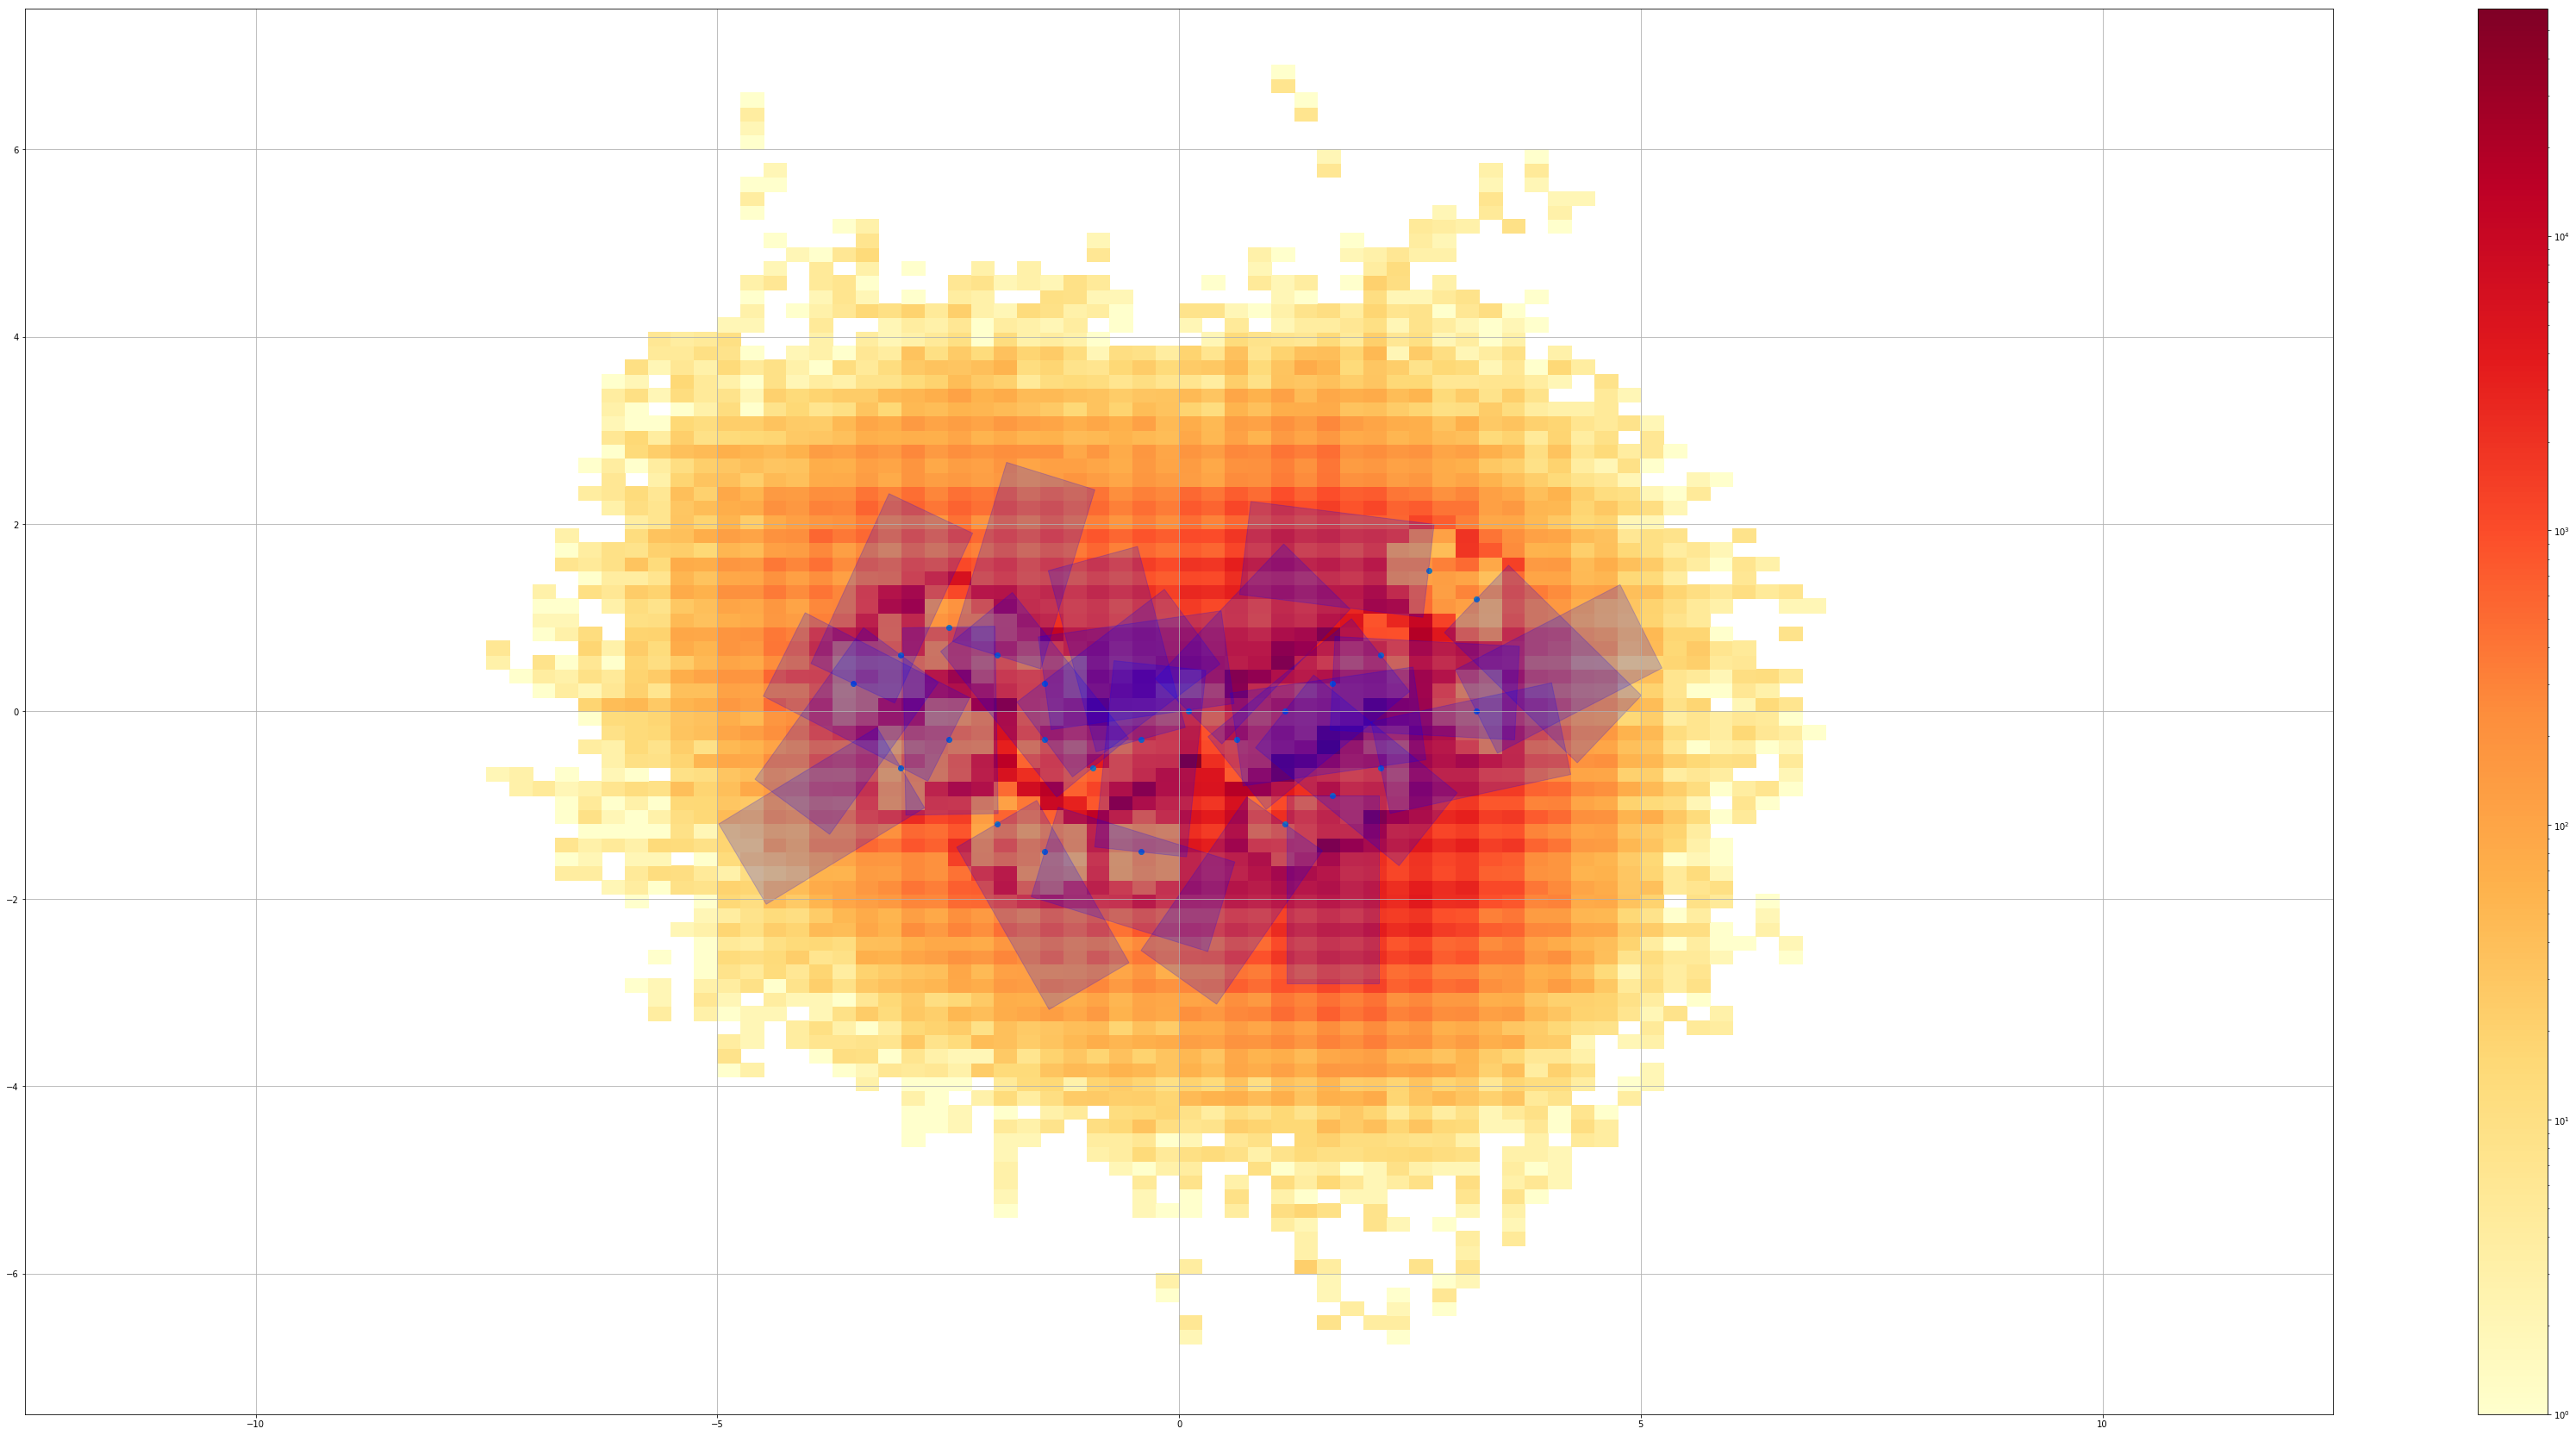

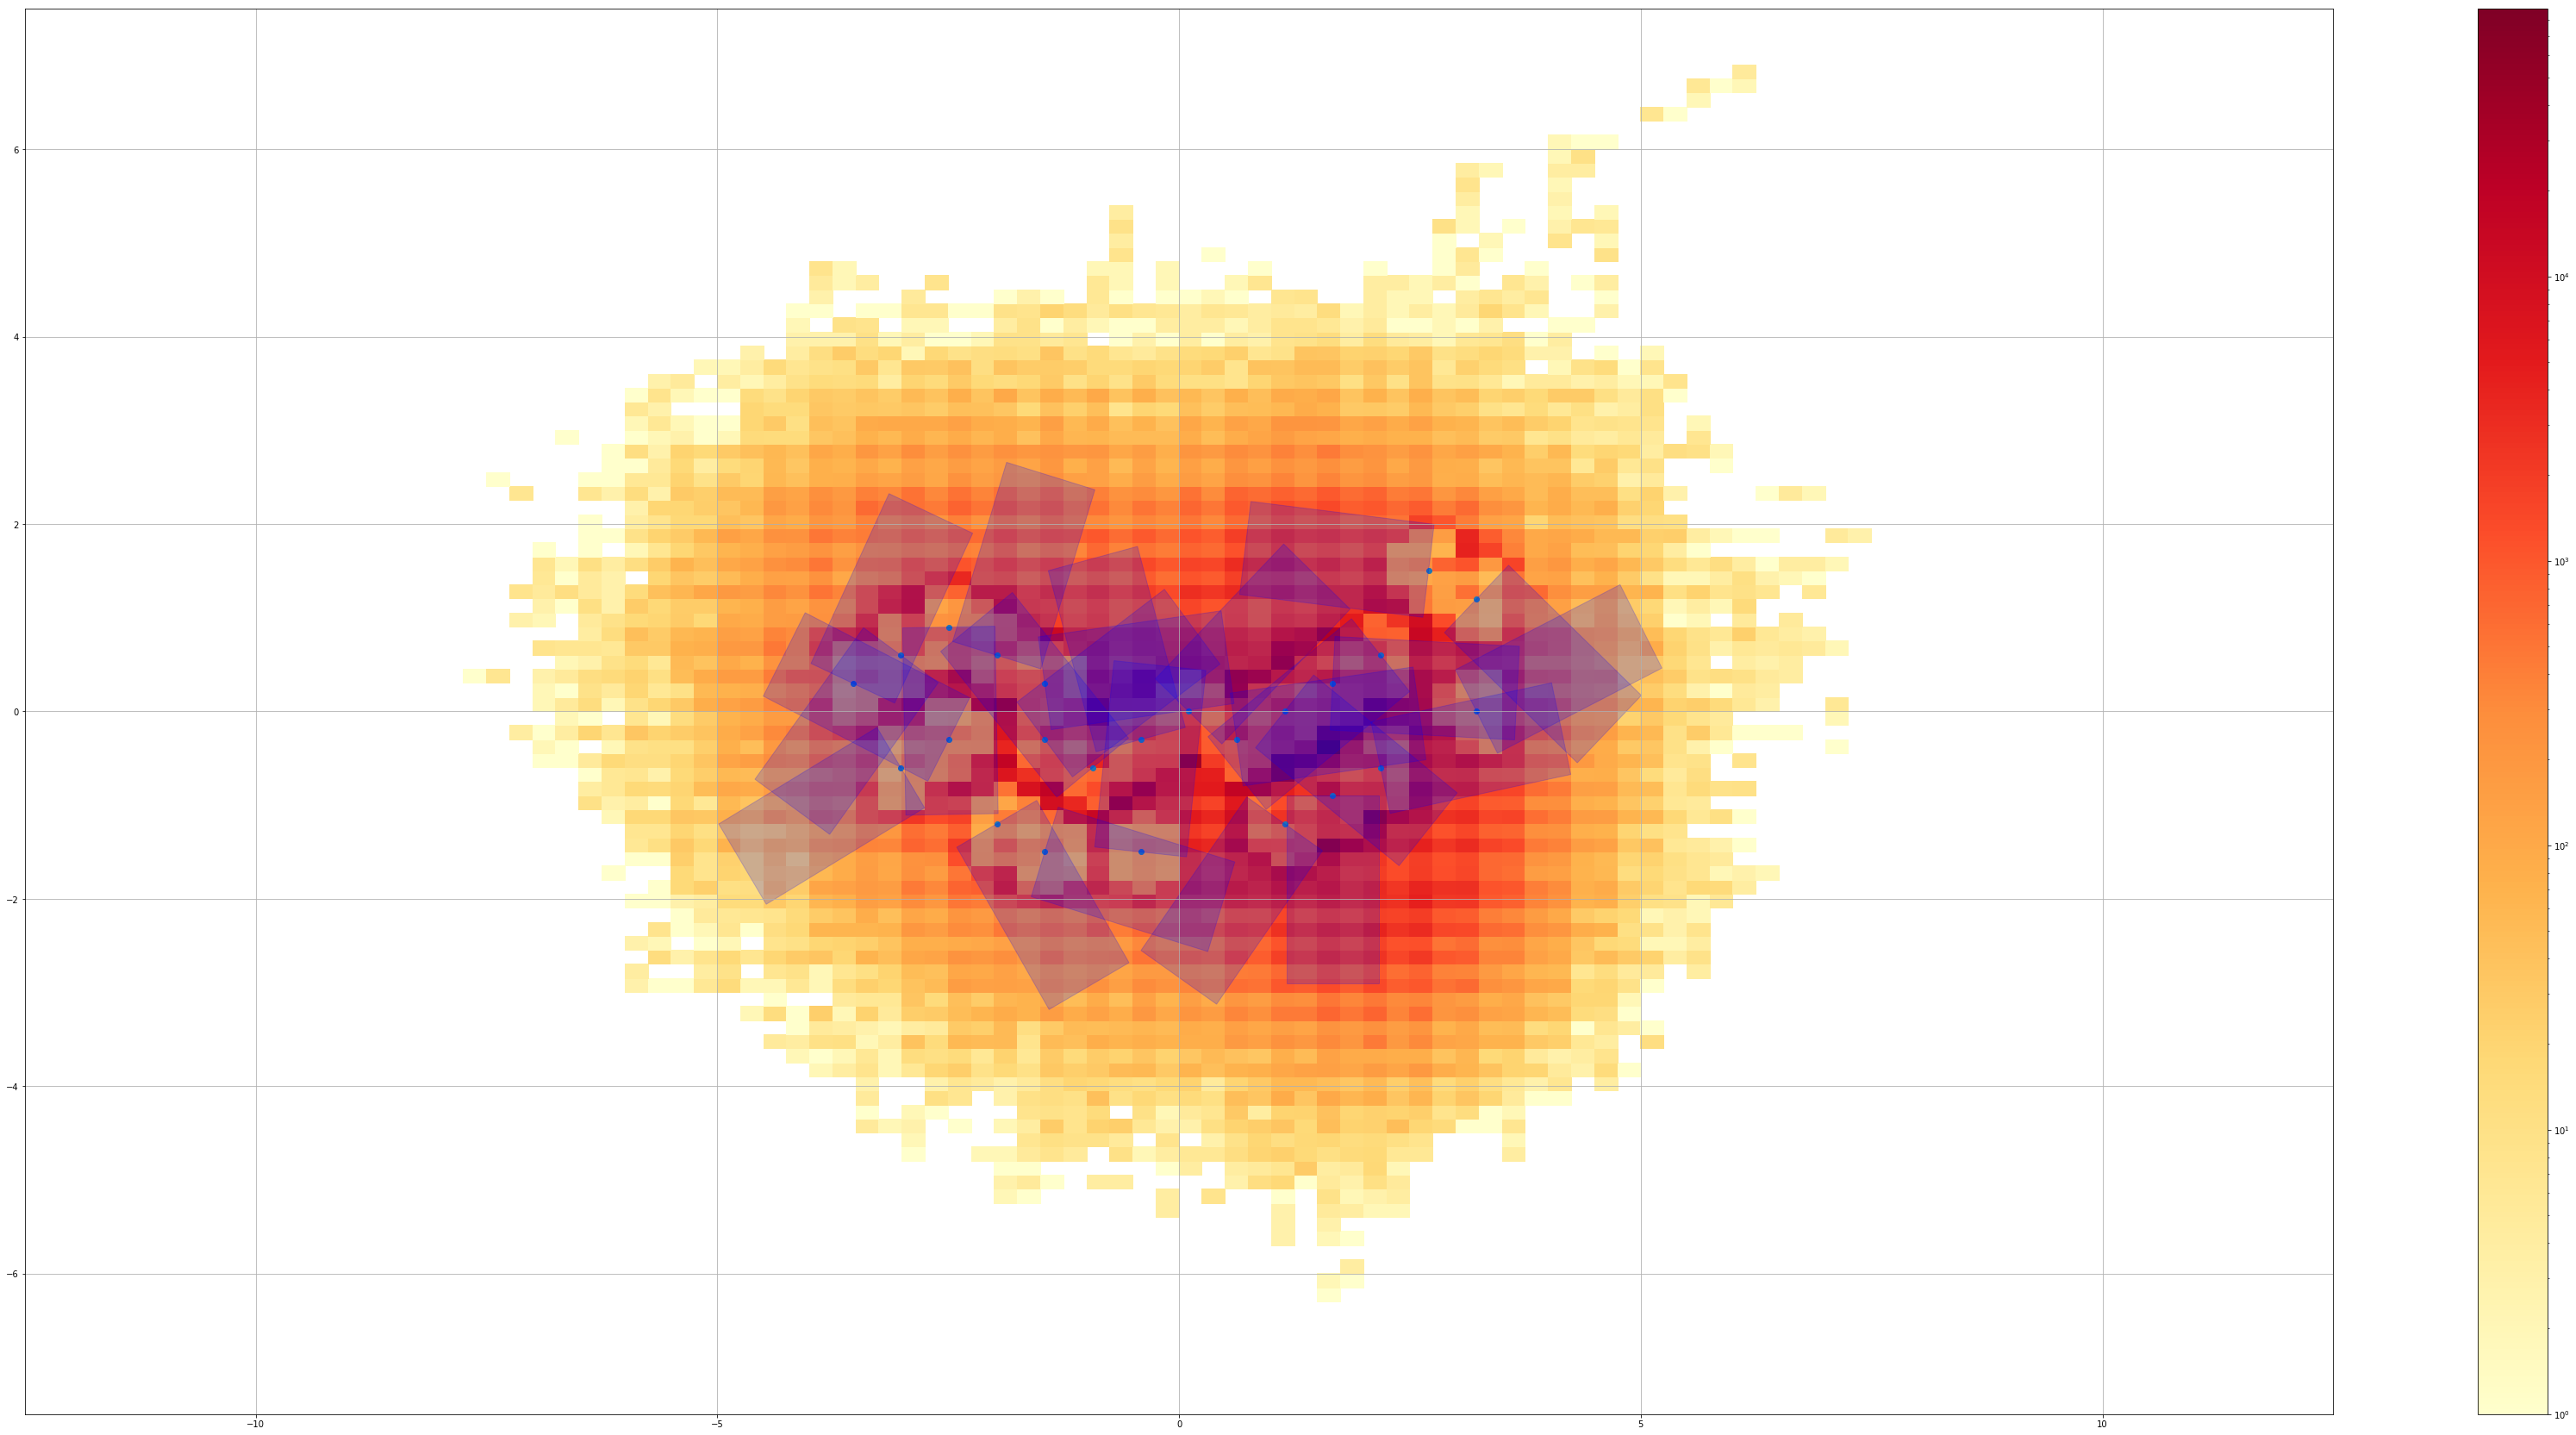

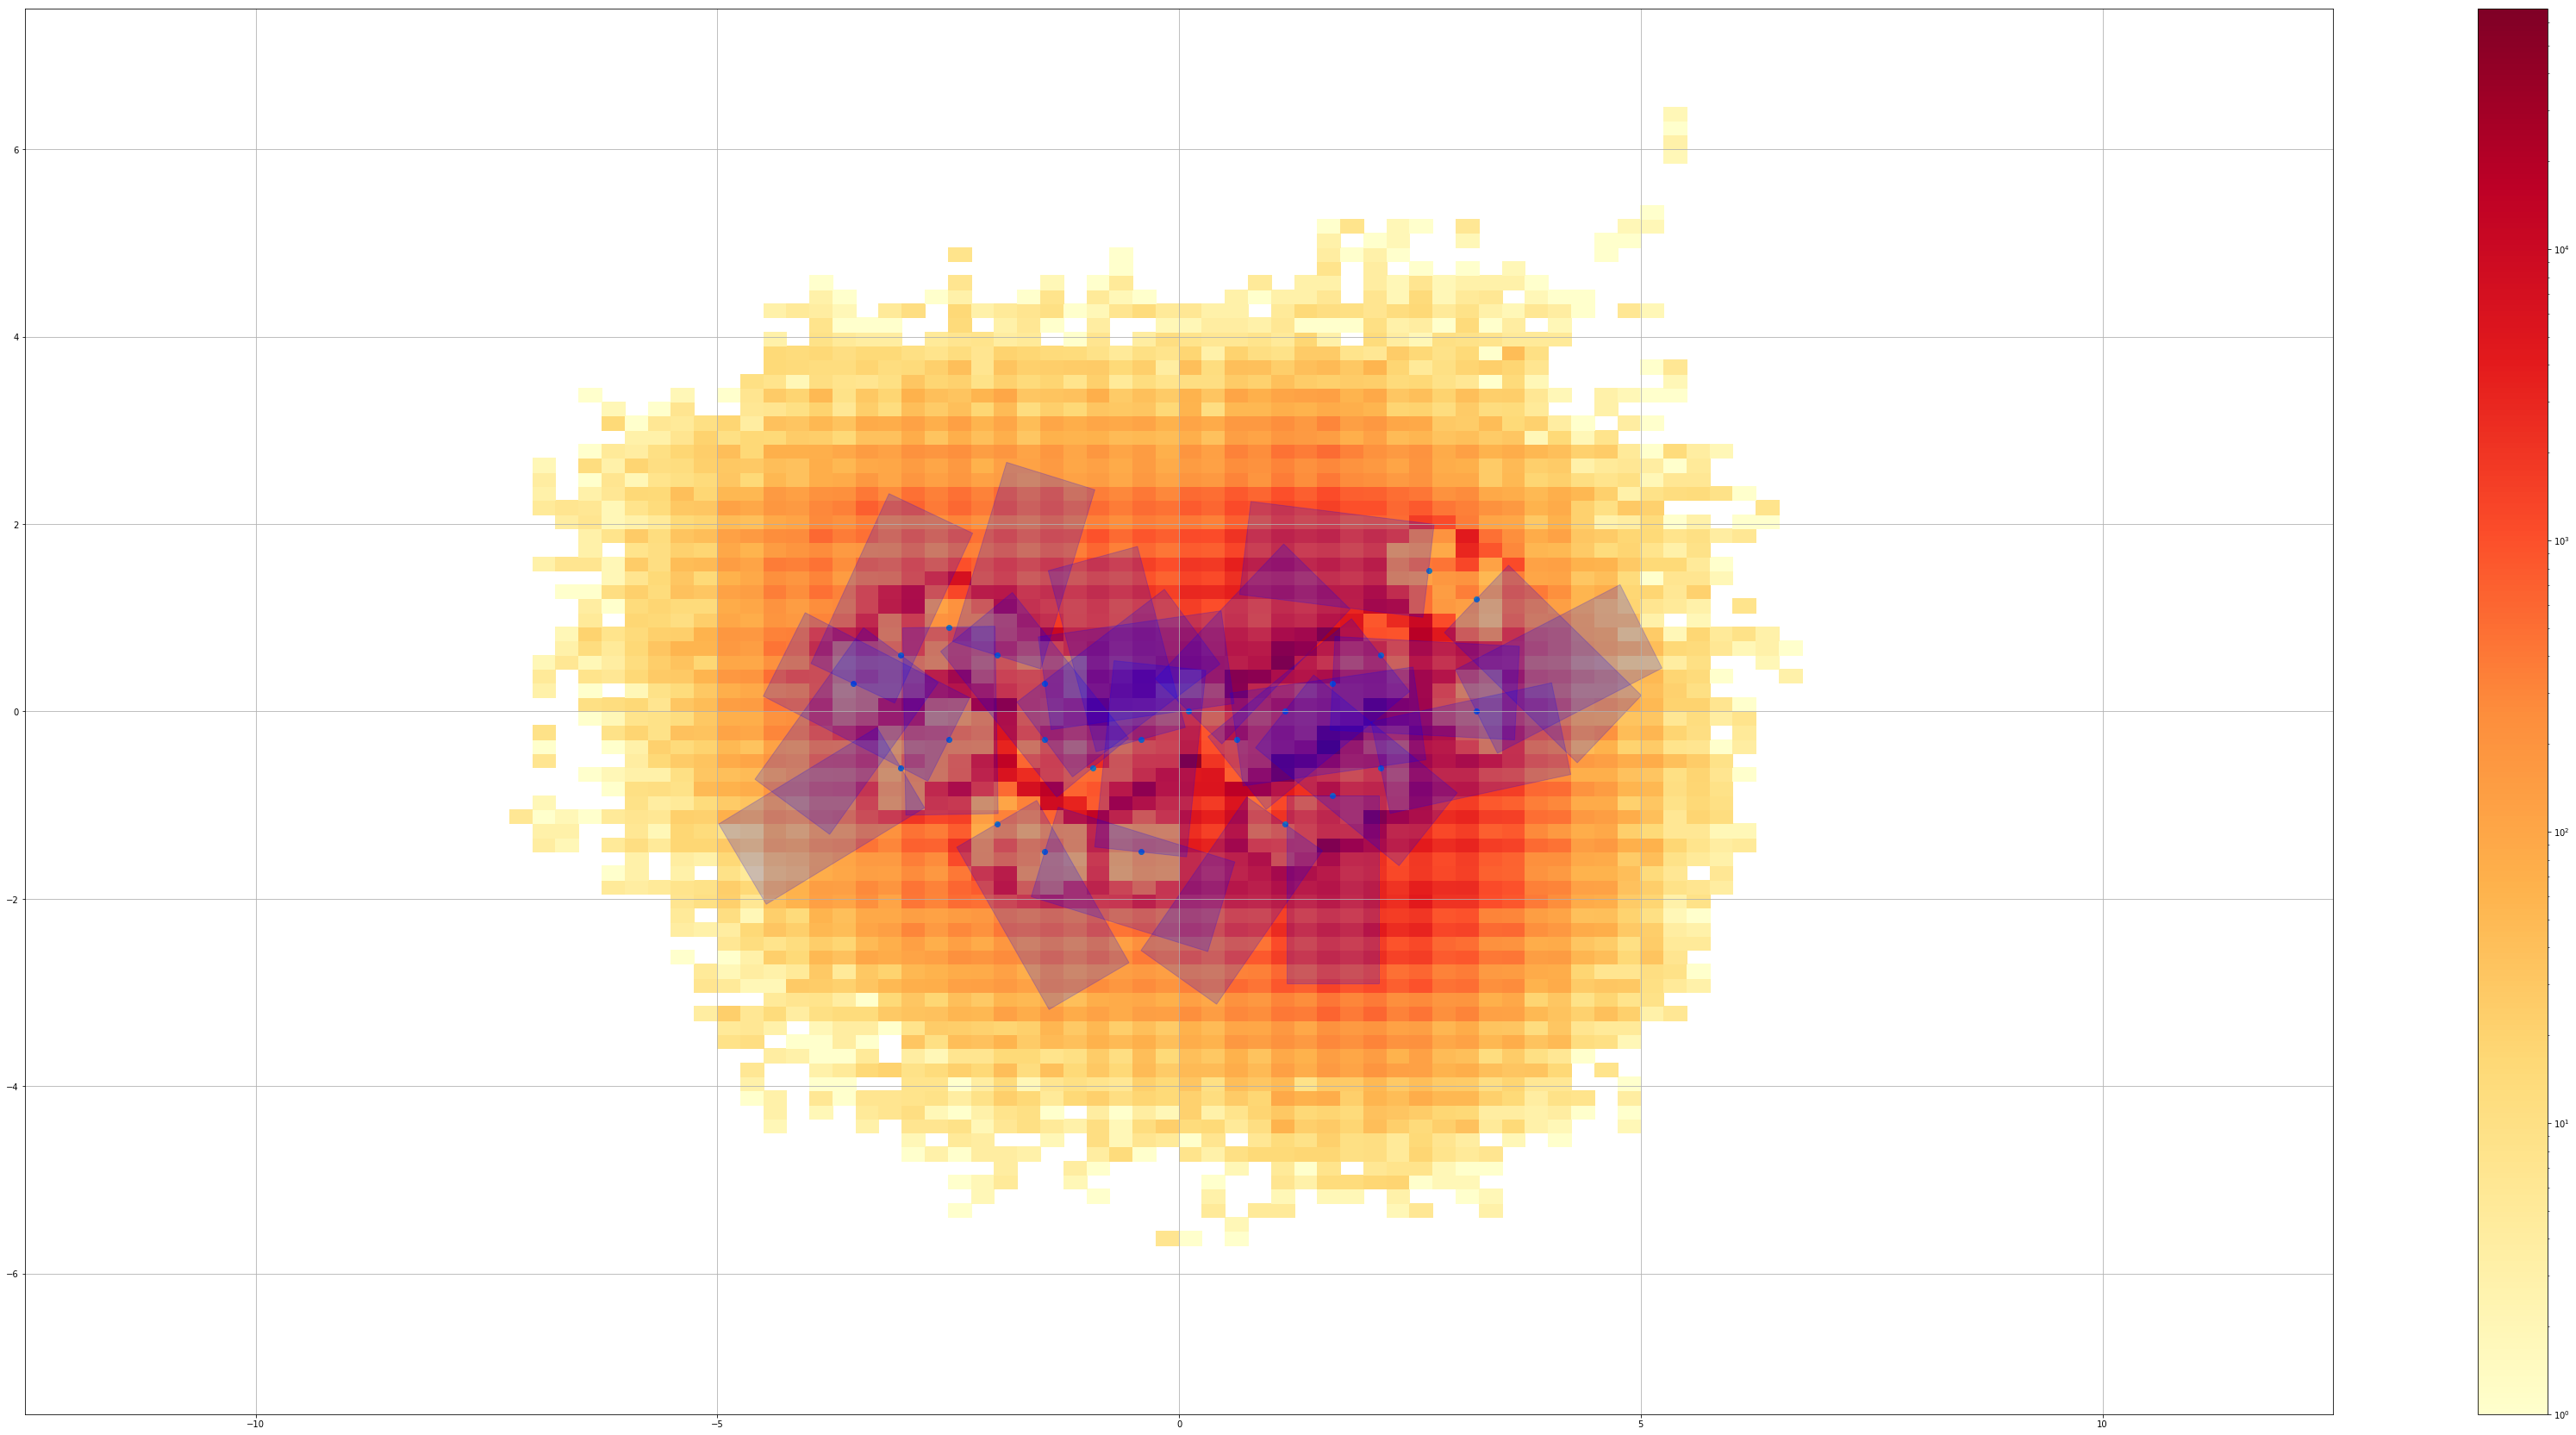

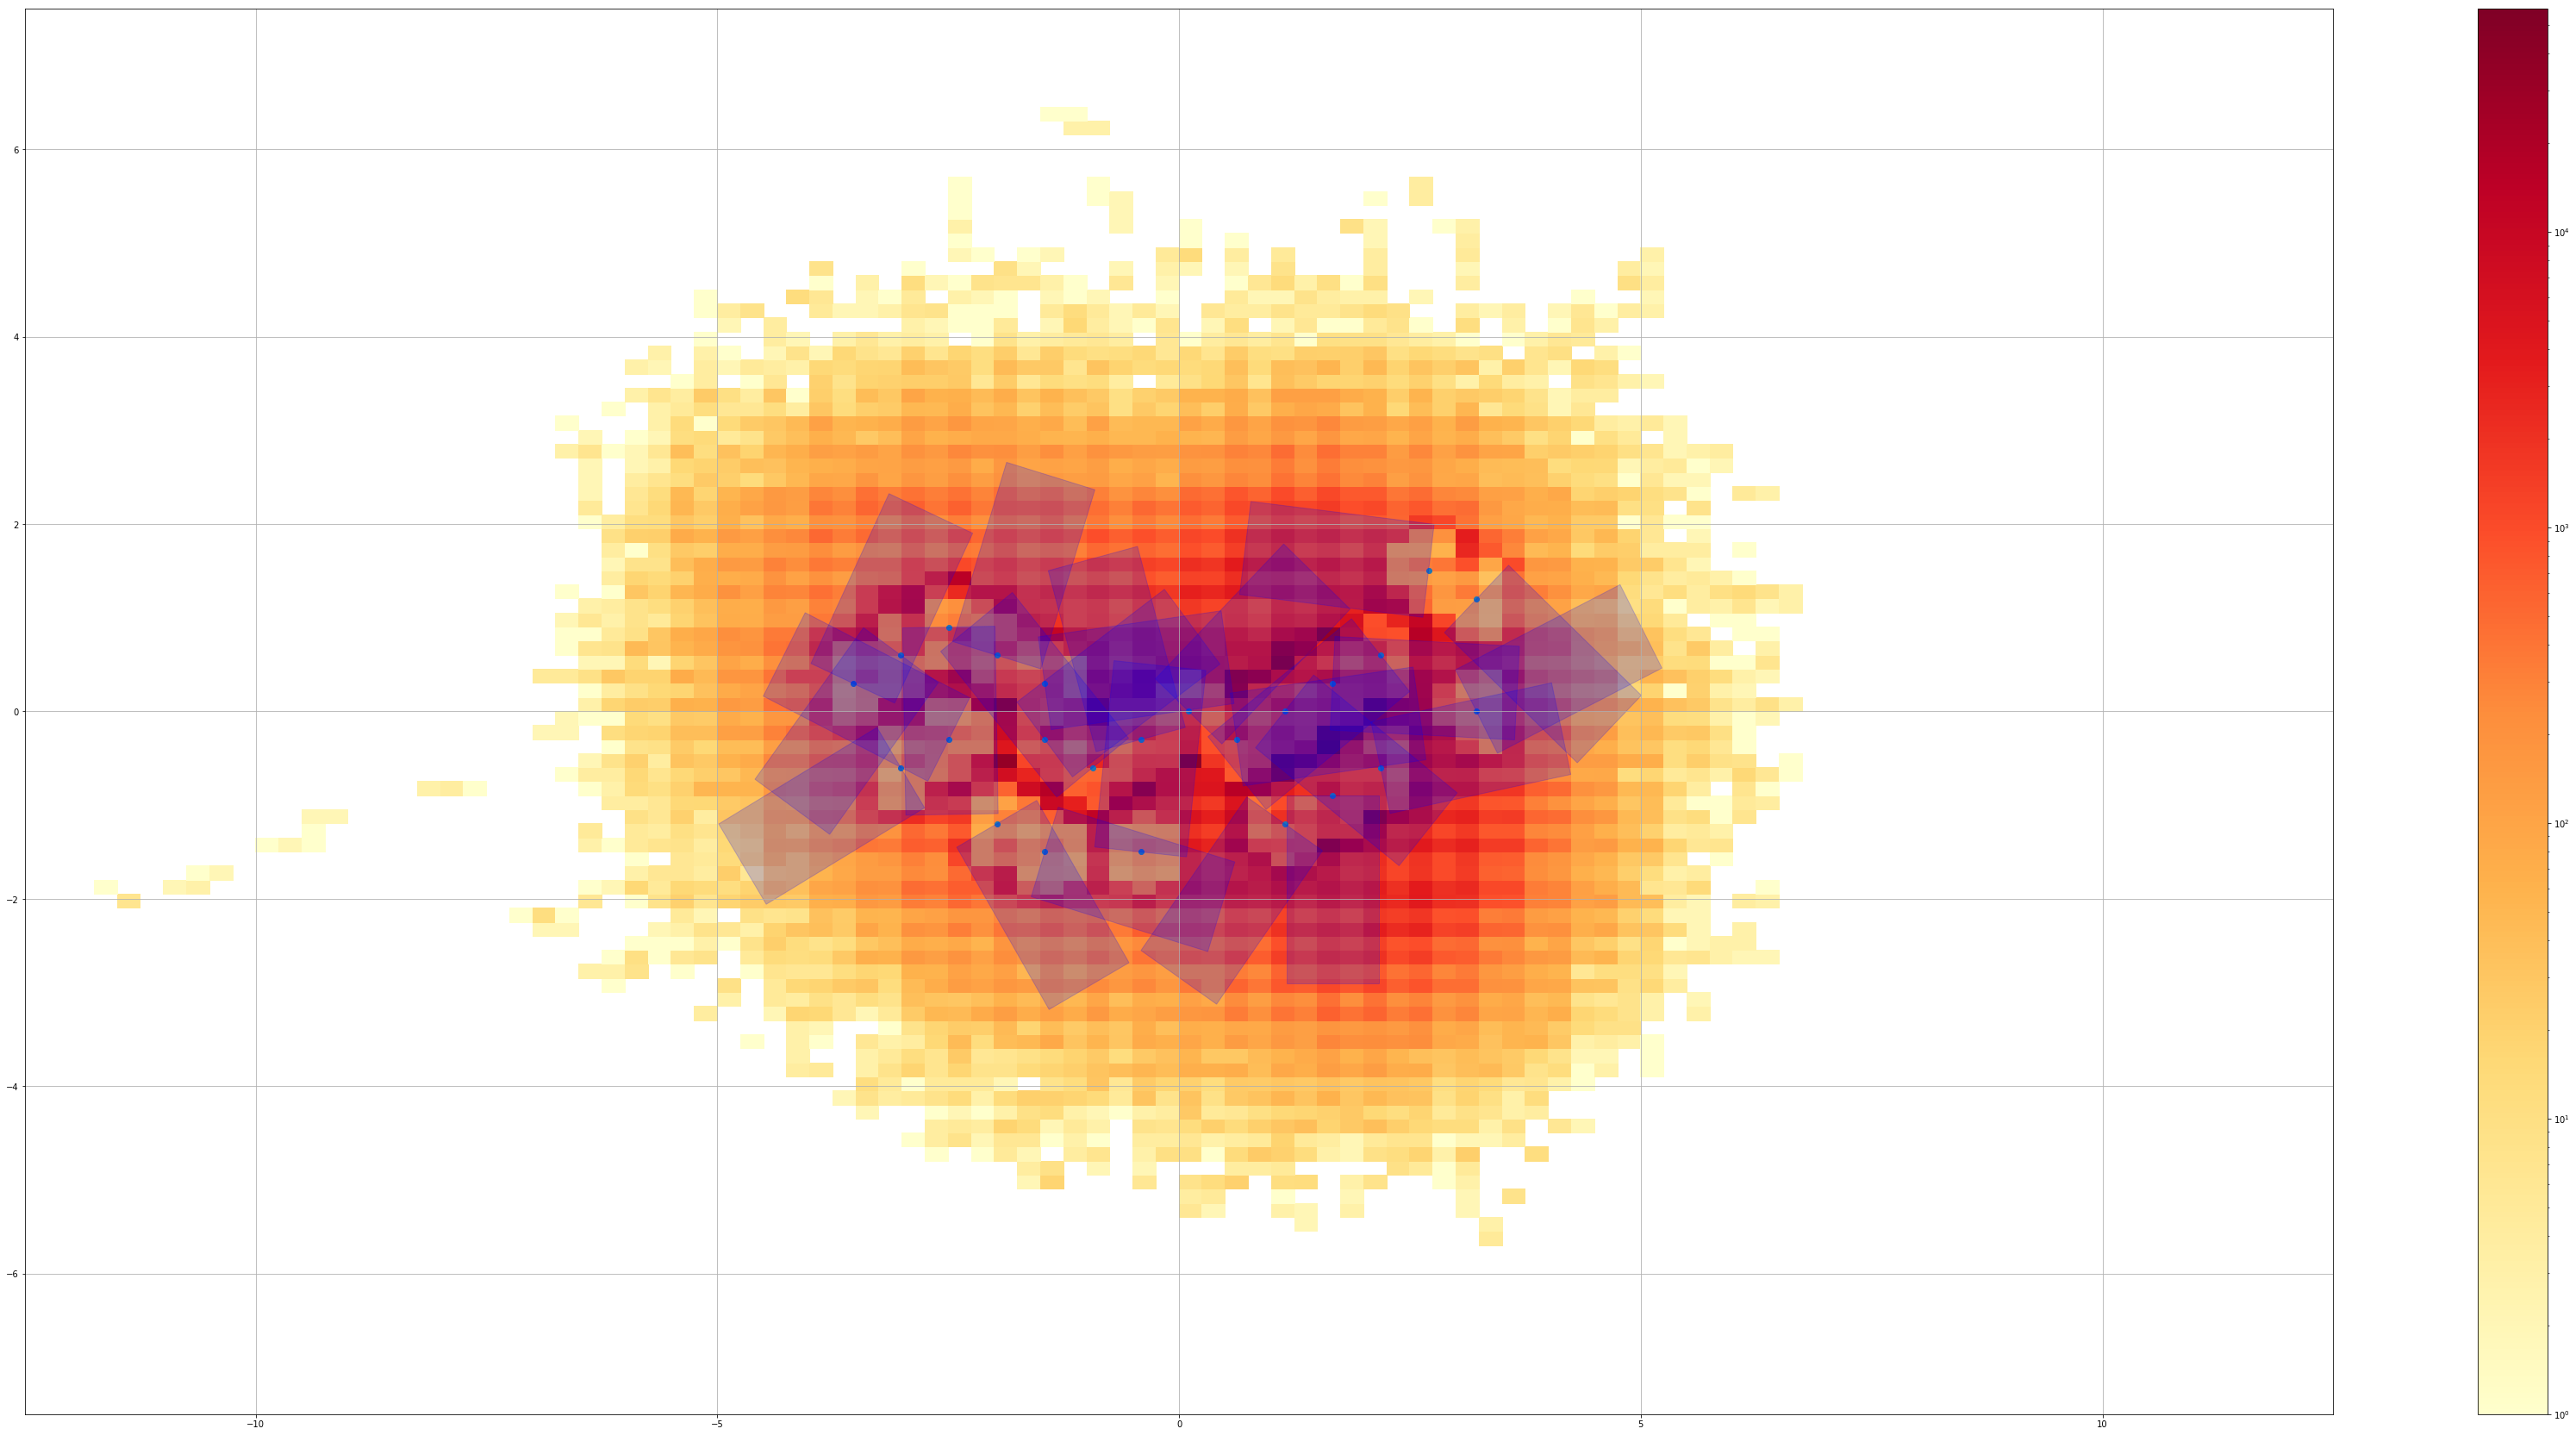

In [14]:
from matplotlib.colors import LogNorm
for v in range(5):
    
    fig = plt.figure(figsize=(60,30))
    ax = fig.add_subplot(111)

    plt.hist2d(visitor_data['Location_x_{}'.format(v+1)], visitor_data['Location_z_{}'.format(v+1)], bins=100, normed=False, range=[[-12.5,12.5],[-7.5,7.5]], cmap='YlOrRd', norm=LogNorm())
    plt.colorbar()
    plt.grid()
    plot_scene(ax)

--------------

## Debug section

In [12]:
## DEBUG ##
# subtract files near the place it breaks
import re
from collections import deque
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/SARA_LED_Multi/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/SARA_LED_Multi/"+file_date+"/visitor_log_partial.txt","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# title = "Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,"+ \
#         "Location_x_2,Location_y_2,Location_z_2,Destination_x_2,Destination_y_2,Destination_z_2,Distance_2,"+ \
#         "Location_x_3,Location_y_3,Location_z_3,Destination_x_3,Destination_y_3,Destination_z_3,Distance_3,"+ \
#         "Location_x_4,Location_y_4,Location_z_4,Destination_x_4,Destination_y_4,Destination_z_4,Distance_4,"+ \
#         "Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5"+"\n"
# f_out.write(title)

lines_before = deque(maxlen=100)
lines_after = deque(maxlen=100)

for line in f_in:
    if line.strip():# not empty line    
        lines_before.append(line)
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None and x[0]=='18179.68': #locate the crash event
            print("Record found")
            break
            
for line in f_in:
    if line.strip():
        lines_after.append(line)
    if len(lines_after) >= 100:
        break
for line in lines_before:
    f_out.write(line)
for line in lines_after:
    f_out.write(line)
            
        
f_in.close()
f_out.close()



['../SHARCNET/Results/SARA_LED_Multi/2019-07-30-063158\\s_multi_sara_17799892ob.out']
